In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
# Link: https://www.data-blogger.com/2017/11/15/python-matplotlib-pyplot-a-perfect-combination/
data_path = "home-credit-default-risk/application_train.csv"
pdf_data = pd.read_csv(data_path)
pdf_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
pdfGender = pdf_data[pdf_data['CODE_GENDER'].isin(['F','M'])]
pdfGender = pdfGender.groupby("CODE_GENDER").size()
pdfGender

CODE_GENDER
F    202448
M    105059
dtype: int64

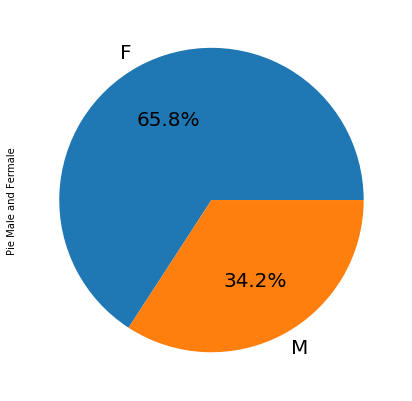

In [18]:
# pie plot
pdfGender.name ="Pie Male and Fermale"
pdfGender.plot.pie(figsize=(7,7),autopct="%.1f%%",fontsize=20)
plt.show()

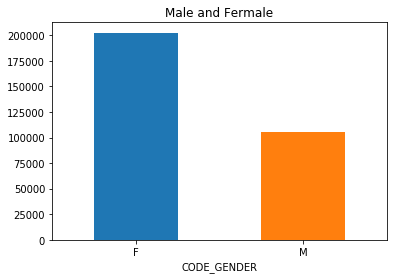

In [34]:
pdfGender.plot.bar(rot=0)
plt.title('Male and Fermale')
plt.show()


   TARGET CODE_GENDER   count
0       0           F  188278
1       0           M   94404
2       1           F   14170
3       1           M   10655
TARGET            0      1
CODE_GENDER               
F            188278  14170
M             94404  10655


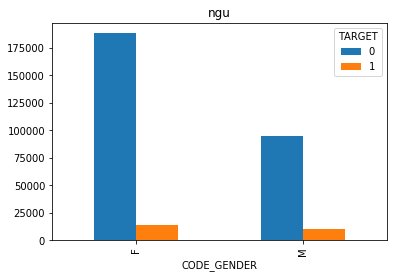

In [53]:
# group gender by target
pdf00 = pdf_data[pdf_data['CODE_GENDER'].isin(["F","M"])]
pdf00 =pdf00.groupby(['TARGET','CODE_GENDER']).agg({'CODE_GENDER':'count'})


# rename column
pdf00.columns = ["count"]

# print(pdf00)
# print(pdf00)
# pivot table for plotting
pdf00 = pdf00.reset_index()
print(pdf00)
pdf00 = pdf00.pivot(index="CODE_GENDER",columns="TARGET",values="count")
print(pdf00)
pdf00.plot.bar(title='ngu')
plt.show()

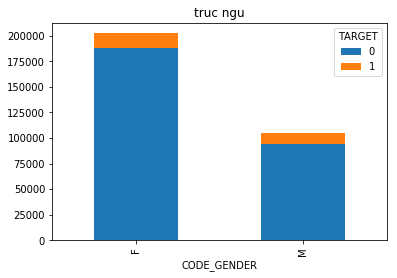

In [55]:
pdf00.plot.bar(stacked="True",title="truc ngu")
plt.show()

Text(0.5, 1.0, 'figure bins=100')

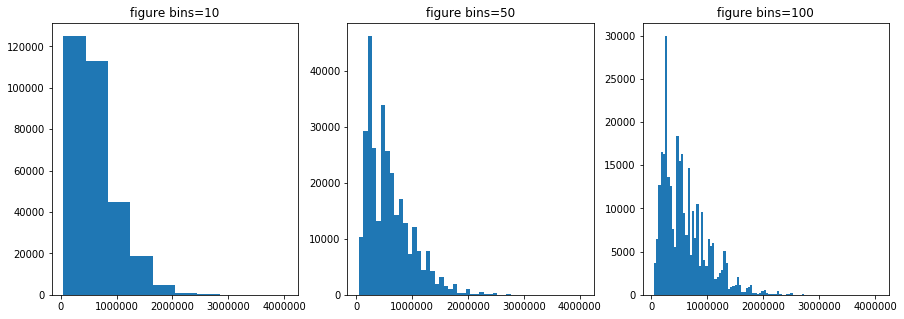

In [67]:
pdf01 = pdf_data['AMT_CREDIT']
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
ax[0].hist(pdf01,bins=10)
ax[0].set_title('figure bins=10')
ax[1].hist(pdf01,bins=50)
ax[1].set_title('figure bins=50')
ax[2].hist(pdf01,bins=100)
ax[2].set_title('figure bins=100')

0      406
1     1293
2      135
3      312
4      513
5      490
6     1560
7     1530
8     1019
9      405
10     652
11     148
12      80
13     918
14     773
15     299
16     509
17     270
18     157
19     544
Name: AMT_CREDIT, dtype: int32
0       406
1      1699
2      1834
3      2146
4      2659
5      3149
6      4709
7      6239
8      7258
9      7663
10     8315
11     8463
12     8543
13     9461
14    10234
15    10533
16    11042
17    11312
18    11469
19    12013
Name: AMT_CREDIT, dtype: int32
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19] [406, 1699, 1834, 2146, 2659, 3149, 4709, 6239, 7258, 7663, 8315, 8463, 8543, 9461, 10234, 10533, 11042, 11312, 11469, 12013]


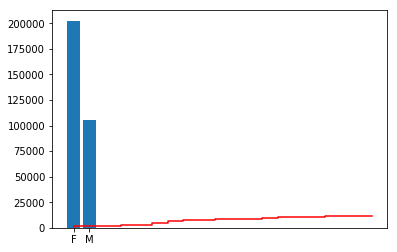

In [84]:
pdf02 = pdf_data['AMT_CREDIT'].head(20)
pdf02 = (pdf02/1000).astype("int")
print(pdf02)
cum = pdf02.cumsum()
print(cum)
cumX = list(cum.index)
cumY = list(cum.values)
print(cumX, cumY)
fig , ax = plt.subplots()
ax.step(cumX, cumY,'r')
ax.bar(pdfGender.index.tolist(),pdfGender.values.tolist())
plt.show()

In [ ]:
def my_scatter_plotter(ax, pdf, var1, var2):
    pearson_corr = pdf[[var1, var2]].corr().iloc[0][1]
    ax.scatter(pdf[var1], pdf[var2])
    ax.set_title("Pearson correlation: {:.2f}".format(pearson_corr))
    ax.set_xlabel(var1)
    ax.set_ylabel(var2)
    

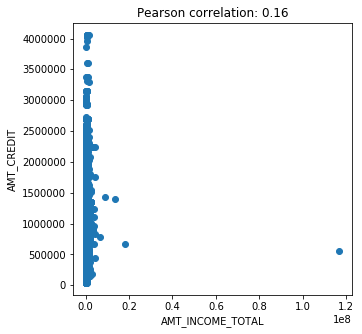

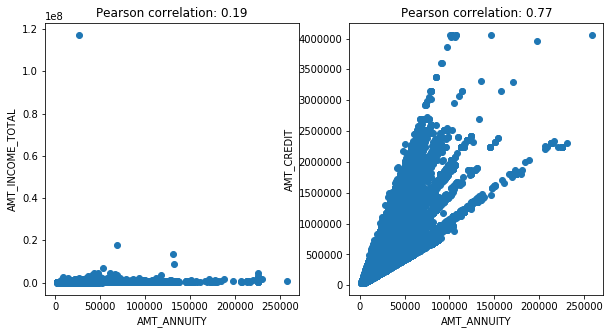

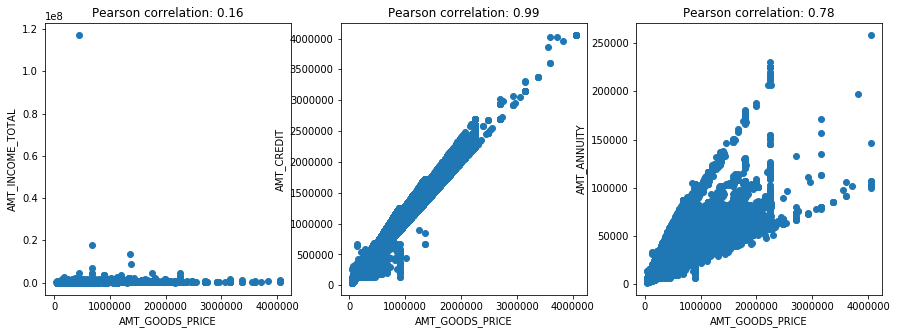

In [86]:
def my_scatter_plotter(ax, pdf, var1, var2):
    pearson_corr = pdf[[var1, var2]].corr().iloc[0][1]
    ax.scatter(pdf[var1], pdf[var2])
    ax.set_title("Pearson correlation: {:.2f}".format(pearson_corr))
    ax.set_xlabel(var1)
    ax.set_ylabel(var2)
    
"""
Tính correlation giữa các cặp biến liên tiếp
ví dụ, các biến A, B, C ta sẽ tính correlation giữa AB, AC, BC
do đối xứng nên ta sẽ không tính lại BA, CA, CB
"""

# danh sách column muốn quan sát
ls_cols = [
    'AMT_INCOME_TOTAL',
    'AMT_CREDIT',
    'AMT_ANNUITY',
    'AMT_GOODS_PRICE'
]

n_col = len(ls_cols)
for i in range(1, n_col):
    # biến span sẽ tăng dần từ 1 đến n
    # span thể hiện phạm vi ta lấy tổ hợp để tính correlation
    span = i
    
    # mỗi dòng sẽ plot span column
    fig, axes = plt.subplots(nrows=1, ncols=span, figsize=(5 * span, 5))
    if span > 1:
        for j in range(span):        
            var1 = ls_cols[i]
            var2 = ls_cols[j]
            my_scatter_plotter(axes[j], pdf_data, var1, var2)
    else:
        var1 = ls_cols[0]
        var2 = ls_cols[1]
        my_scatter_plotter(axes, pdf_data, var1, var2)
        
    plt.show()